# 주문지역 인구특성 시각화(3) - 서울특별시 여성 중심으로


In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [209]:
raw_pop = pd.read_csv('KGUPOPLTNINFO.csv', header=None)
pop = raw_pop.copy()
pop.head(5)

,0,1,2,3,4,5,6,7
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [210]:
## 컬럼명 설정

In [211]:
pop.columns = ["date", "code", "sido","gu","age","totalpop","malepop","femalepop"]

In [212]:
pop.head(5)

,date,code,sido,gu,age,totalpop,malepop,femalepop
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [213]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157374 entries, 0 to 157373
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       157374 non-null  int64 
 1   code       157374 non-null  int64 
 2   sido       157374 non-null  object
 3   gu         157374 non-null  object
 4   age        157374 non-null  object
 5   totalpop   157374 non-null  int64 
 6   malepop    157374 non-null  int64 
 7   femalepop  157374 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 9.6+ MB


In [214]:
pop['date']
#2018년 1월 ~ 2020년 6월까지

0         201801
1         201802
2         201803
3         201804
4         201805
           ...  
157369    202002
157370    202003
157371    202004
157372    202005
157373    202006
Name: date, Length: 157374, dtype: int64

In [215]:
## 날짜를 연도와 월 컬럼으로 나누기

In [216]:
pop['date'] = pop['date'].astype('string')

In [217]:
year = []
for i in pop['date']:
    year.append(i[0:4])
pop['year']=year

In [218]:
month = []
for i in pop['date']:
    month.append(i[4:6])
pop['month']=month
    

In [219]:
pop

,date,code,sido,gu,age,totalpop,malepop,femalepop,year,month
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016,2018,01
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000,2018,02
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986,2018,03
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983,2018,04
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990,2018,05
...,...,...,...,...,...,...,...,...,...,...
157369,202002,50130,제주특별자치도,서귀포시,100+,99,11,88,2020,02
157370,202003,50130,제주특별자치도,서귀포시,100+,102,11,91,2020,03
157371,202004,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,04
157372,202005,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,05


In [220]:
pop['year'] = pop['year'].astype('int')
pop['month'] = pop['month'].astype('int')

In [221]:
pop = pop.drop(['date','code'], axis=1)

In [222]:
pop.head(30)

,sido,gu,age,totalpop,malepop,femalepop,year,month
0,서울특별시,종로구,0-4세,4070,2054,2016,2018,1
1,서울특별시,종로구,0-4세,4049,2049,2000,2018,2
2,서울특별시,종로구,0-4세,4022,2036,1986,2018,3
3,서울특별시,종로구,0-4세,4008,2025,1983,2018,4
4,서울특별시,종로구,0-4세,4007,2017,1990,2018,5
5,서울특별시,종로구,0-4세,3979,2014,1965,2018,6
6,서울특별시,종로구,0-4세,3946,1992,1954,2018,7
7,서울특별시,종로구,0-4세,3949,2004,1945,2018,8
8,서울특별시,종로구,0-4세,3930,2002,1928,2018,9
9,서울특별시,종로구,0-4세,3926,1986,1940,2018,10


In [223]:
pop['sido'].unique()
#전국 데이터 있음, 배달 데이터는 서울과 경기도만 있기 때문에 나중에 빼서 살펴보기로!

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [224]:
pop['age'].unique()

array(['0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세',
       '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세',
       '65-69세', '70-74세', '75-79세', '80-84세', '85-89세', '90-94세',
       '95-99세', '100+'], dtype=object)

#### 각 연도의 가장 마지막 월을 뽑은 전국 데이터셋

In [225]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [226]:
#각 연도의 가장 마지막 월을 뽑은 데이터셋
pop_201812 = pop[(pop['year']==2018) & (pop['month']==12)]
pop_201912 = pop[(pop['year']==2019) & (pop['month']==12)]
pop_20206 = pop[(pop['year']==2020) & (pop['month']==6)]

In [227]:
pop_concat = pd.concat([pop_201812, pop_201912, pop_20206])

In [228]:
pop_concat = pop_concat.drop('month', axis=1)
pop_concat

,sido,gu,age,totalpop,malepop,femalepop,year
11,서울특별시,종로구,0-4세,3873,1966,1907,2018
23,서울특별시,종로구,5-9세,4715,2414,2301,2018
35,서울특별시,종로구,10-14세,5316,2708,2608,2018
47,서울특별시,종로구,15-19세,7067,3550,3517,2018
59,서울특별시,종로구,20-24세,11176,5416,5760,2018
...,...,...,...,...,...,...,...
157349,제주특별자치도,서귀포시,80-84세,5098,1888,3210,2020
157355,제주특별자치도,서귀포시,85-89세,2972,803,2169,2020
157361,제주특별자치도,서귀포시,90-94세,876,141,735,2020
157367,제주특별자치도,서귀포시,95-99세,330,38,292,2020


#### 각 연도의 가장 마지막 월을 뽑은 서울특별시 데이터셋

In [229]:
#서울만 추출
seoul = pop_concat[pop_concat['sido']=='서울특별시']
seoul

,sido,gu,age,totalpop,malepop,femalepop,year
11,서울특별시,종로구,0-4세,3873,1966,1907,2018
23,서울특별시,종로구,5-9세,4715,2414,2301,2018
35,서울특별시,종로구,10-14세,5316,2708,2608,2018
47,서울특별시,종로구,15-19세,7067,3550,3517,2018
59,서울특별시,종로구,20-24세,11176,5416,5760,2018
...,...,...,...,...,...,...,...
128999,서울특별시,강동구,80-84세,6748,2749,3999,2020
129005,서울특별시,강동구,85-89세,3364,977,2387,2020
129011,서울특별시,강동구,90-94세,1455,304,1151,2020
129017,서울특별시,강동구,95-99세,379,80,299,2020


### 결론
- 서울특별시 & 여성으로만 살펴봄


- 여성인구 top3: 송파구, 강서구, 강남구 
- 여성인구 점유율 top3:마포구, 서초구, 강남구



- 타깃 설정
    - 20대: 마포구, 강서구
    - 30대: 송파구
    - 40대: 서초구, 강남구

## (추가) 연령별 여성 인구

### 1. 20-24세

In [230]:
seoul2020 = seoul[seoul['year']==2020]

In [231]:
seoul2020_grouped = seoul2020.groupby(['gu','age']).sum().reset_index()

In [232]:
seoul2020_grouped['femaleratio'] = seoul2020_grouped['femalepop']/seoul2020_grouped['totalpop']*100
seoul2020_grouped['maleratio'] = seoul2020_grouped['malepop']/seoul2020_grouped['totalpop']*100

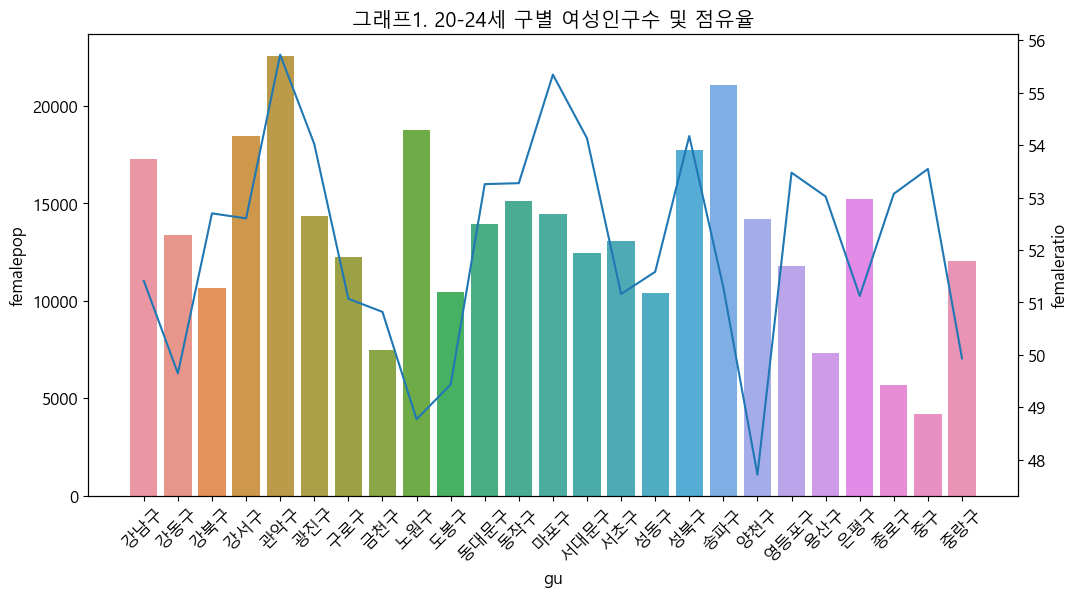

In [239]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='20-24세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='20-24세'])
plt.xticks(rotation=45)

plt.title('그래프1. 20-24세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#20-24세 여성인구는 관악구, 송파구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 관악구,마포구,서대문구가 많다.

### 2. 25-29세

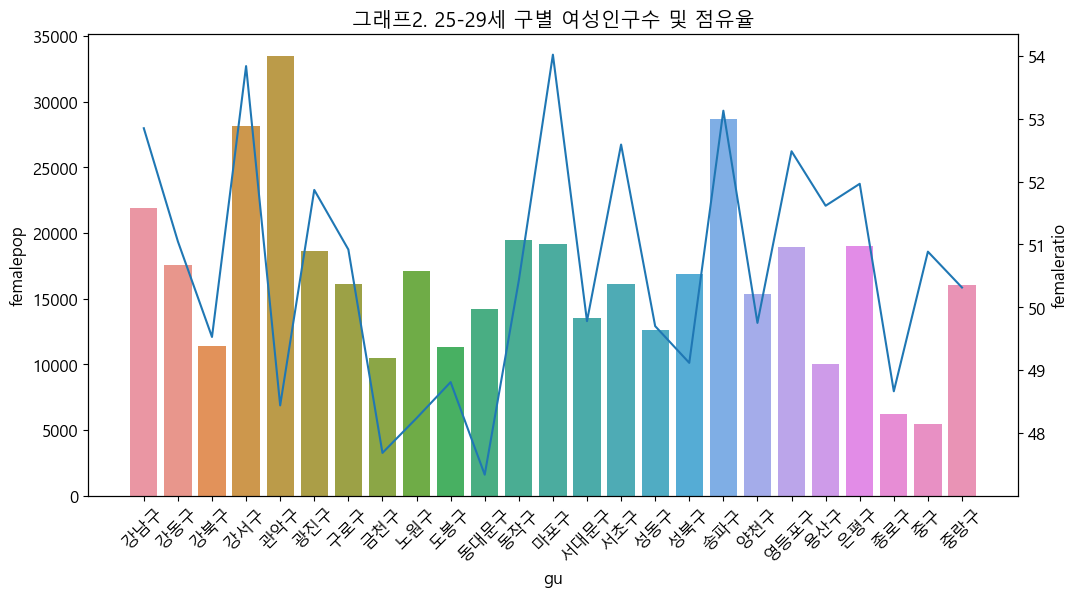

In [240]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='25-29세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='25-29세'])
plt.xticks(rotation=45)

plt.title('그래프2. 25-29세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#25-29세 여성인구는 관악구, 송파구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 마포구,강서구가 많다.

### 3. 30세-34세

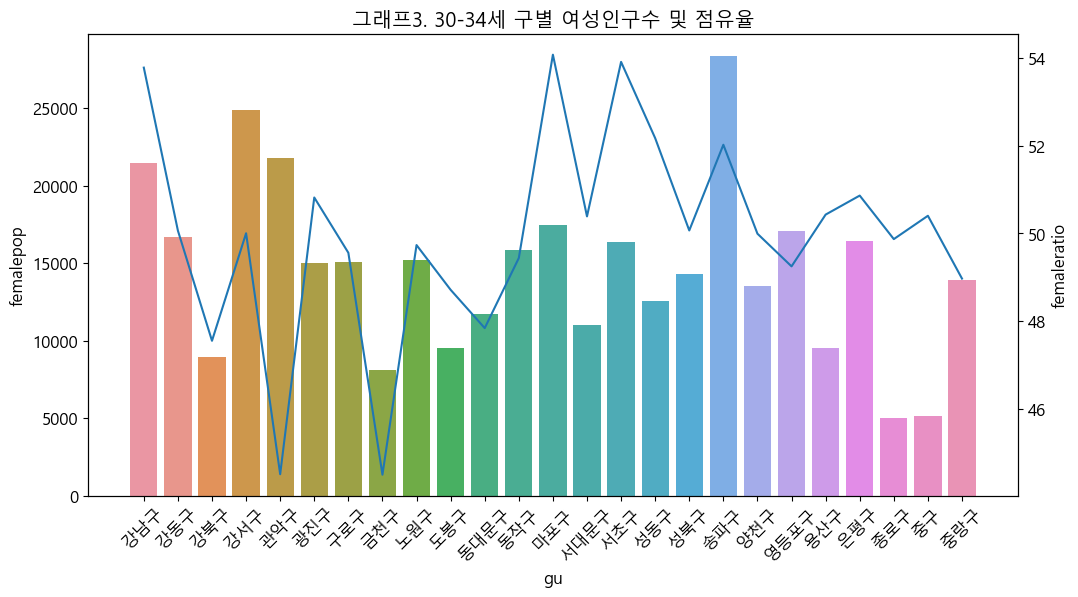

In [241]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='30-34세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='30-34세'])
plt.xticks(rotation=45)

plt.title('그래프3. 30-34세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#30-34세 여성인구는 송파구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 마포구,강남구,서초구가 많다.

### 4. 35세-39세

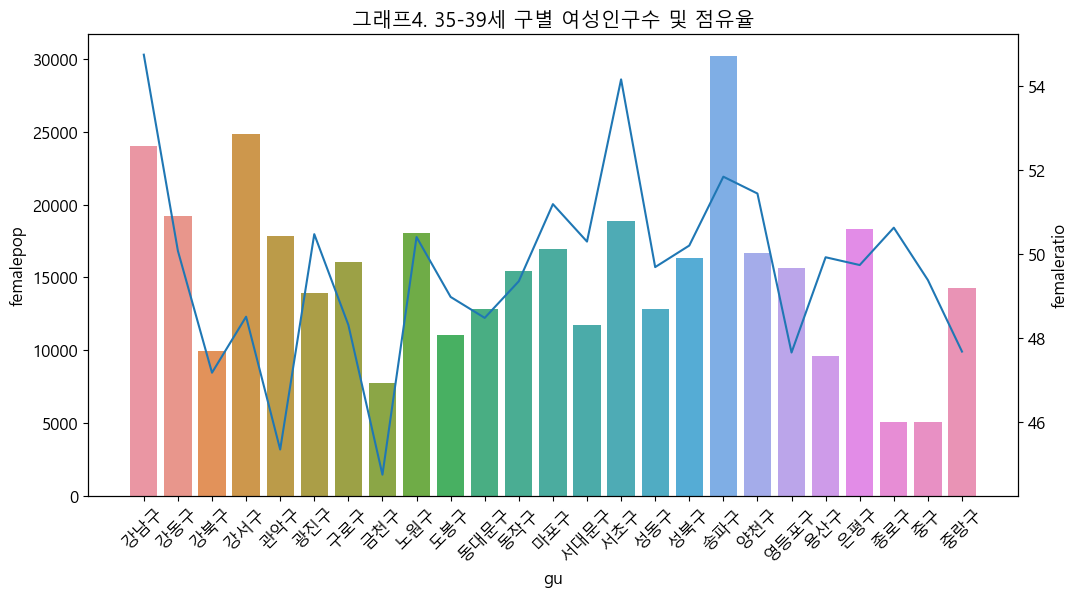

In [243]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='35-39세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='35-39세'])
plt.xticks(rotation=45)

plt.title('그래프4. 35-39세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#35-39세 여성인구는 송파구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 강남구,서초구가 많다.

### 5. 40세-44세

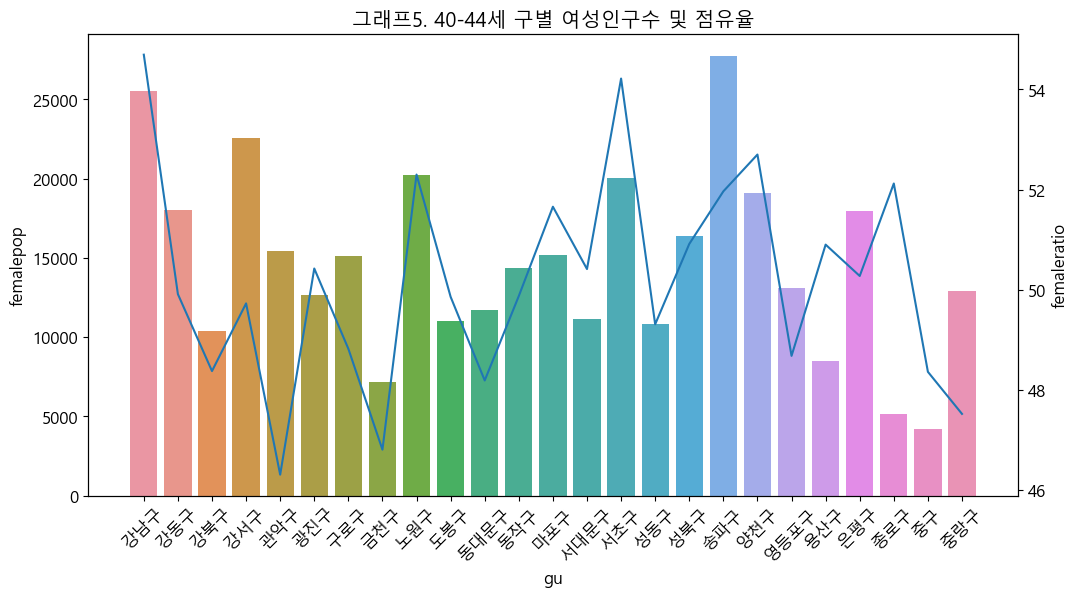

In [245]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='40-44세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='40-44세'])
plt.xticks(rotation=45)

plt.title('그래프5. 40-44세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#40-44세 여성인구는 송파구, 강남구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 강남구,서초구가 많다.

### 6. 45세-49세

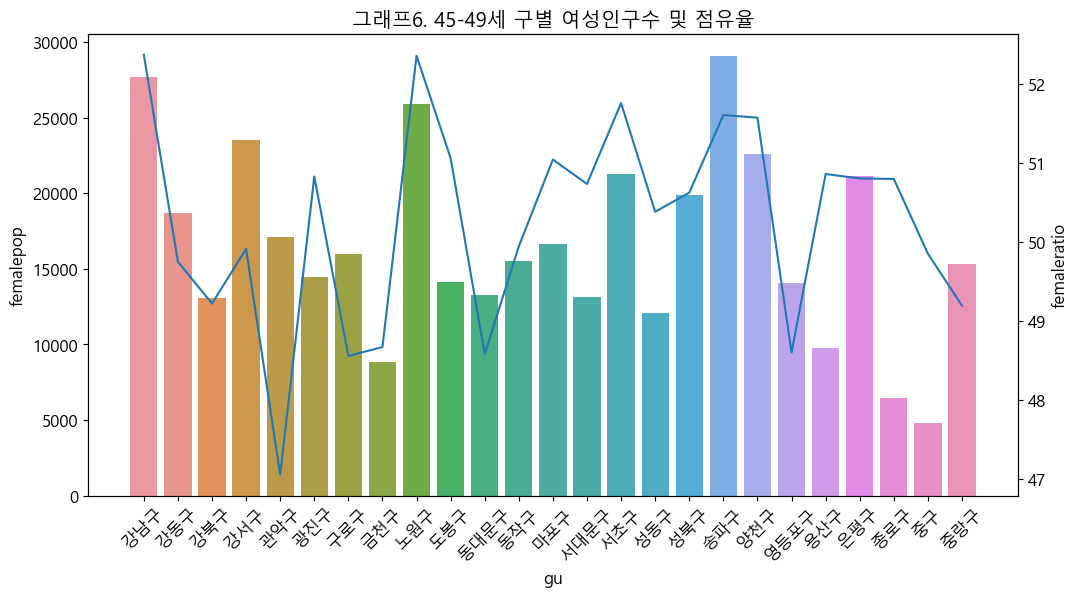

In [246]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')


fig, ax1 = plt.subplots()
ax1 = sns.barplot(x='gu', y='femalepop',data=seoul2020_grouped[seoul2020_grouped['age']=='45-49세'])
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='gu', y='femaleratio',data=seoul2020_grouped[seoul2020_grouped['age']=='45-49세'])
plt.xticks(rotation=45)

plt.title('그래프6. 45-49세 구별 여성인구수 및 점유율')
plt.show()

#그래프 해석
#45-49세 여성인구는 송파구, 강남구, 노원구가 많다.
#각 구별 총인구 대비 여성 점유율로 따지면 강남구,노원구가 많다.

# 결론 (서울특별시 여성 인구 연령별로 보기)
1. 20세-24세
    - 인구수: 관악구, 송파구
    - 점유율: 관악구,마포구,서대문구
    
    
2. 25세-29세
    - 인구수: 관악구,송파구
    - 점유율: 마포구,강서구
    
    
3. 30세-34세
    - 인구수: 송파구
    - 점유율: 마포구,강남구,서초구
    
    
4. 35세-39세
    - 인구수: 송파구
    - 점유율: 강남구,서초구
    
    
5. 40세-44세
    - 인구수: 송파구,강남구
    - 점유율: 강남구,서초구
    
    
6. 45세-49세
    - 인구수: 송파구,강남구,노원구
    - 점유율: 강남구,노원구


### 여성 인구수로 보면 송파구가 압도적
### 여성 점유율로 보면 강남구, 서초구, 마포구가 자주 보여짐